In [ ]:
# basic libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset

### Importing and normalizing the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd drive/MyDrive/QROSS\ Project

In [ ]:
import os

# Dictionary to store the coordinates for each instance
instances = {}
index = 0

folderpath = 'drive/MyDrive/QROSS Project/instances'
for filename in os.listdir(folderpath):
  filepath = os.path.join(folderpath, filename)
  with open(filepath, 'r') as file:
    file_content = file.read()

    start_collecting = False
    coordinates = []

    for line in file_content.splitlines():
        if "NODE_COORD_SECTION" in line:
            start_collecting = True
            continue

        if "EOF" in line or line.strip() == '':
            break

        if start_collecting:
            parts = line.split()
            if len(parts) >= 3:
                # Append [x, y] coordinates (ignore the first column)
                coordinates.append([float(parts[1]), float(parts[2])])

    instances[index] = coordinates
    index += 1

In [ ]:
for instance in instances:
    print(f"Instance: {instance}\nCoordinates: {instances[instance]}\n")
    break

Instance: 0
Coordinates: [[4614.274297151191, 3931.2251221333217], [3513.5472981585335, 2603.349684754843], [516.8704884877817, 3285.487293339856], [8886.778578131263, 9397.716271013996], [4972.563347195024, 4910.2226228650325], [4116.926621758446, 6775.55891866245], [6532.043572771134, 4944.017033086178], [8579.603438591517, 4736.5882685222805], [7217.045786080074, 187.08918202905323], [7098.050576243579, 2429.2410866107016], [2096.042177202304, 6484.80023151759], [7604.349877907258, 8723.37840062904], [7623.087762123158, 5471.185650402222], [4530.1416139296325, 5347.812675470026], [9104.065387922137, 5070.166873617272], [2575.3641119799995, 2559.4621798860016], [7251.207237592937, 9685.583811369535], [9603.646624746776, 7818.033334241554], [4620.5704973069005, 4756.881007476987], [1792.598120944292, 7944.2123923767695], [4147.498174202265, 249.99938928965682], [1719.1475377452293, 7580.487983366834], [3219.6041442841183, 8574.570513417737], [1220.2297227456115, 3611.81148349941], [10

In [ ]:
instances[35]

[[190.90116849279775, 590.4280175750611],
 [166.92708168528983, 530.2271396316246],
 [1085.991923849472, 16.922422544709608],
 [481.1400572117718, 1646.5622569153477],
 [13.17437595135608, 29.384015131643572],
 [579.5977925840228, 183.09074463391653],
 [3152.535909779576, 469.4891656526584],
 [56.79395127865876, 335.7676041800954],
 [140.16984710530528, 1415.9907047276663],
 [298.4056652503395, 432.6438567934434],
 [1329.4159078188572, 398.07979715224917],
 [184.34432775505695, 310.6223243278328],
 [1413.9458436791929, 71.70924057019577],
 [229.8380192520161, 12.507313429062522],
 [119.85732963663749, 267.10190426680424],
 [1068.128373699216, 72.16722331618915],
 [4.4735957948030896, 260.74107597220853],
 [315.9927811661698, 453.1032177042161],
 [74.37417532866615, 462.03510416808166],
 [391.5463212784245, 568.466736501489],
 [20.04917685531651, 200.4640408371322],
 [230.93189213865705, 1251.8991123066855],
 [1572.7308604790571, 269.1672960446028],
 [592.4233980658983, 398.928663581323

Euclidean coordinates of the 35th graph instance

In [ ]:
print(len(instances)) # no of instances

print(f"TSP problem of {len(instances[0])} cities")

85
TSP problem of 30 cities


In [ ]:
# upload training data
from google.colab import files

uploaded_1 = files.upload()

Saving syn_tsp199_instance1.csv to syn_tsp199_instance1.csv
Saving syn_tsp198_instance1.csv to syn_tsp198_instance1.csv
Saving syn_tsp197_instance1.csv to syn_tsp197_instance1.csv
Saving syn_tsp196_instance1.csv to syn_tsp196_instance1.csv
Saving syn_tsp195_instance1.csv to syn_tsp195_instance1.csv
Saving syn_tsp194_instance1.csv to syn_tsp194_instance1.csv
Saving syn_tsp193_instance1.csv to syn_tsp193_instance1.csv
Saving syn_tsp192_instance1.csv to syn_tsp192_instance1.csv
Saving syn_tsp191_instance1.csv to syn_tsp191_instance1.csv
Saving syn_tsp190_instance1.csv to syn_tsp190_instance1.csv
Saving syn_tsp189_instance1.csv to syn_tsp189_instance1.csv
Saving syn_tsp188_instance1.csv to syn_tsp188_instance1.csv
Saving syn_tsp187_instance1.csv to syn_tsp187_instance1.csv
Saving syn_tsp186_instance1.csv to syn_tsp186_instance1.csv
Saving syn_tsp185_instance1.csv to syn_tsp185_instance1.csv
Saving syn_tsp139_instance1.csv to syn_tsp139_instance1.csv
Saving syn_tsp138_instance1.csv to syn_t

In [ ]:
import csv
import io

# Dictionary to store data for each instance
data = {}
index = 0

for filename, file_data in uploaded_1.items():

    file_content = file_data.decode('utf-8')
    instance_data = []

    csv_reader = csv.reader(io.StringIO(file_content))
    next(csv_reader, None) # skip header

    for row in csv_reader:
        relaxation_param = float(row[0])
        p_f = float(row[1])
        e_std = float(row[2])
        e_avg = float(row[3])
        e_min = float(row[4])

        instance_data.append([relaxation_param, p_f, e_std, e_avg, e_min])

    data[index] = instance_data
    index += 1

In [ ]:
data[0]

[[1952.0, 0.046875, 19742.68658959116, 1589.5882639783756, 16002.903095621281],
 [1963.73, 0.09375, 19473.011286900026, 1707.33894599255, 14431.542971968564],
 [1975.46, 0.09375, 19719.393036730966, 1760.625229231797, 15323.22732076887],
 [1987.19,
  0.0859375,
  19586.066396959617,
  1671.6822963055959,
  15294.998406548984],
 [1998.92, 0.09375, 19684.75764020148, 1603.5228005634756, 14857.323014821144],
 [2010.65,
  0.109375,
  19697.548021540402,
  1714.0942541317752,
  15375.955876578548],
 [2022.38, 0.0625, 19613.151720002446, 1633.6079661477456, 16169.548478202982],
 [2034.1100000000001,
  0.078125,
  20075.025932871697,
  1937.0910441635394,
  15457.263771187776],
 [2045.8400000000001,
  0.0859375,
  19720.14948044042,
  1593.7927385524322,
  15558.473735400723],
 [2057.57,
  0.09375,
  19970.807302733072,
  1657.9415027804748,
  16255.948222279825],
 [2069.3, 0.0625, 20139.940015935288, 1775.9012038865753, 14556.130855716416],
 [2081.03, 0.125, 20160.118929929886, 1873.26949309

In [ ]:
data[0][0] # data[i][j] = [relaxation parameter, p_f, e_std, e_avg, e_min] for the jth run of the ith instance

[1952.0, 0.046875, 19742.68658959116, 1589.5882639783756, 16002.903095621281]

In [ ]:
# normalize instance coordinates

print(len(instances)) # no of graph instances
print(len(instances[56])) # no of coordinates per graph

85
30



data dict has relax, e_f etc values for each instance. \\
instance dict has 30 coordinates for each graph instance. \\

#### Normalization

In [ ]:
import numpy as np

normalized_instances = {}

for index, coordinates in instances.items():
    if isinstance(coordinates, list) and all(isinstance(coord, list) and len(coord) == 2 for coord in coordinates):
        x_coords = [coord[0] for coord in coordinates]
        y_coords = [coord[1] for coord in coordinates]

        mean_x = np.mean(x_coords)
        stddev_x = np.std(x_coords)
        mean_y = np.mean(y_coords)
        stddev_y = np.std(y_coords)

        # Normalize formula
        normalized_coords = [
            [(x - mean_x) / stddev_x, (y - mean_y) / stddev_y] for x, y in coordinates
        ]

        normalized_instances[index] = normalized_coords
    else:
        print(f"Skipping instance {filename}: Invalid data format")

In [ ]:
normalized_instances

{0: [[-0.1218799595765012, -0.4605723233636027],
  [-0.5256540179504421, -0.940044852464019],
  [-1.6249096537104084, -0.6937369269040227],
  [1.4453809457434639, 1.5132817465884392],
  [0.009549381158791942, -0.10707349776176403],
  [-0.3043194650124112, 0.5664667200876529],
  [0.581605540597991, -0.09487092899508885],
  [1.3327014595156783, -0.16976981751581935],
  [0.832881400930302, -1.8125141380579861],
  [0.7892309963824792, -1.0029124133363765],
  [-1.0456301755064346, 0.4614788581549924],
  [0.9749541811246749, 1.2697901696827154],
  [0.9818277034077834, 0.09548041202067913],
  [-0.15274192169548828, 0.05093259477197308],
  [1.5250871554582062, -0.04932043428568338],
  [-0.8698029603568491, -0.9558918606720431],
  [0.8454126715631808, 1.6172256661270652],
  [1.708345986816719, 0.9428859462365924],
  [-0.11957035665812803, -0.16244246542005608],
  [-1.1569410075264324, 0.9884469909103604],
  [-0.29310505870428116, -1.7897983656802527],
  [-1.1838845094986377, 0.8571124866530603]

In [ ]:
normalized_instances[0]

[[-0.1218799595765012, -0.4605723233636027],
 [-0.5256540179504421, -0.940044852464019],
 [-1.6249096537104084, -0.6937369269040227],
 [1.4453809457434639, 1.5132817465884392],
 [0.009549381158791942, -0.10707349776176403],
 [-0.3043194650124112, 0.5664667200876529],
 [0.581605540597991, -0.09487092899508885],
 [1.3327014595156783, -0.16976981751581935],
 [0.832881400930302, -1.8125141380579861],
 [0.7892309963824792, -1.0029124133363765],
 [-1.0456301755064346, 0.4614788581549924],
 [0.9749541811246749, 1.2697901696827154],
 [0.9818277034077834, 0.09548041202067913],
 [-0.15274192169548828, 0.05093259477197308],
 [1.5250871554582062, -0.04932043428568338],
 [-0.8698029603568491, -0.9558918606720431],
 [0.8454126715631808, 1.6172256661270652],
 [1.708345986816719, 0.9428859462365924],
 [-0.11957035665812803, -0.16244246542005608],
 [-1.1569410075264324, 0.9884469909103604],
 [-0.29310505870428116, -1.7897983656802527],
 [-1.1838845094986377, 0.8571124866530603],
 [-0.6334796825155212, 

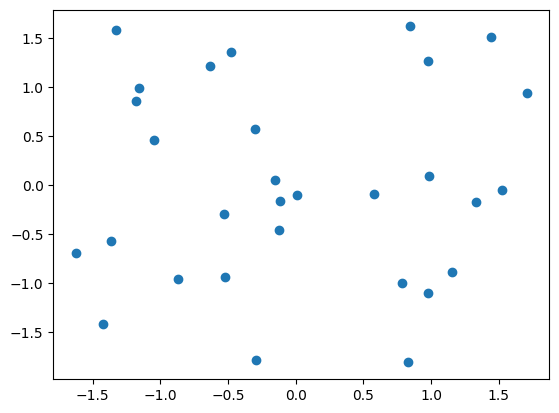

In [ ]:
import matplotlib.pyplot as plt
x = [coord[0] for coord in normalized_instances[0]]
y = [coord[1] for coord in normalized_instances[0]]
plt.scatter(x,y)

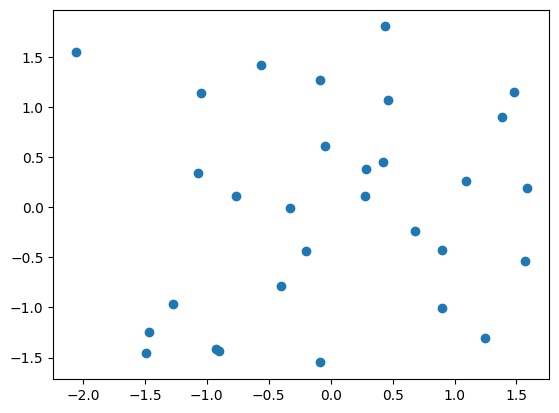

In [ ]:
x = [coord[0] for coord in normalized_instances[71]]
y = [coord[1] for coord in normalized_instances[71]]
plt.scatter(x,y)

In [ ]:
for instance in normalized_instances:
  new_instance = []
  for coordinates in normalized_instances[instance]:
    new_instance.append(coordinates[0])
    new_instance.append(coordinates[1])
  normalized_instances[instance] = new_instance

In [ ]:
normalized_instances[0]

[-0.1218799595765012,
 -0.4605723233636027,
 -0.5256540179504421,
 -0.940044852464019,
 -1.6249096537104084,
 -0.6937369269040227,
 1.4453809457434639,
 1.5132817465884392,
 0.009549381158791942,
 -0.10707349776176403,
 -0.3043194650124112,
 0.5664667200876529,
 0.581605540597991,
 -0.09487092899508885,
 1.3327014595156783,
 -0.16976981751581935,
 0.832881400930302,
 -1.8125141380579861,
 0.7892309963824792,
 -1.0029124133363765,
 -1.0456301755064346,
 0.4614788581549924,
 0.9749541811246749,
 1.2697901696827154,
 0.9818277034077834,
 0.09548041202067913,
 -0.15274192169548828,
 0.05093259477197308,
 1.5250871554582062,
 -0.04932043428568338,
 -0.8698029603568491,
 -0.9558918606720431,
 0.8454126715631808,
 1.6172256661270652,
 1.708345986816719,
 0.9428859462365924,
 -0.11957035665812803,
 -0.16244246542005608,
 -1.1569410075264324,
 0.9884469909103604,
 -0.29310505870428116,
 -1.7897983656802527,
 -1.1838845094986377,
 0.8571124866530603,
 -0.6334796825155212,
 1.2160582517460807,
 -

In [ ]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

Now the instance coordinates are all normalized as per the formula $x^j_i (norm) = (x^j_i - \mu^j)/ \sigma^j$ where $i$ denotes the $i^{th}$ coordinate and $j$ denotes the $j^{th}$ graph instance indexed from 0 -> 84.

#### Dataloader

In [ ]:
import numpy as np

instance_dict = {'train': [], 'val': []}
dataset_sizes = {'train': 0, 'val': 0}

for i in range(len(normalized_instances)):
  if np.random.rand() < 0.8:
    instance_dict['train'].append(normalized_instances[i])
    dataset_sizes['train'] += 1
  else:
    instance_dict['val'].append(normalized_instances[i])
    dataset_sizes['val'] += 1

In [ ]:
# prompt: Write a PyTorch DataLoader for the instance coordinates as defined above

class TSPDataset(Dataset):
    def __init__(self, instances):
        self.instances = instances

    def __len__(self):
        return len(self.instances)

    def __getitem__(self, idx):
        coordinates = torch.tensor(self.instances[idx], dtype=torch.float32)

        return coordinates

# Create a DataLoader
datasets = {x: TSPDataset(instance_dict[x]) for x in ['train', 'val']}
dataloaders = {x: DataLoader(datasets[x], batch_size=16, shuffle=True) for x in ['train', 'val']}

# Example usage:
for instance_data in dataloaders['train']:
    print(instance_data.shape)
    break

torch.Size([16, 60])


### The Autoencoder

In [ ]:
class Autoencoder_TSP(nn.Module):

  def __init__(self, bottleneck):
    super(Autoencoder_TSP, self).__init__()

    self.sig = nn.Sigmoid()

    self.enc1 = nn.Linear(60, 45)
    self.enc2 = nn.Linear(45, bottleneck)
    self.dec1 = nn.Linear(bottleneck, 45)
    self.dec2 = nn.Linear(45, 60)


  def forward(self, x):

    x = self.enc1(x)
    x = self.sig(x)
    x = self.enc2(x)
    x = self.sig(x)
    x = self.dec1(x)
    x = self.sig(x)
    x = self.dec2(x)
    x = self.sig(x)
    x = 2*x - 1             # to re-adjust x value to the interval [-1,1]

    return x

### The Training

In [ ]:
import time
from copy import deepcopy
import matplotlib.pyplot as plt

In [ ]:
def train(model, criterion, optimizer, scheduler, lambda1 = 0, num_epochs = 25):

  since = time.time()

  best_model_wts = deepcopy(model.state_dict())
  best_loss = 1000

  _loss = {'train': [], 'val': []}

  for epoch in range(num_epochs):
    if (epoch+1) % 10 == 0 or epoch == 0:
      print(f'\nEpoch {epoch+1}/{num_epochs}')
      print('-' * 10)

    # each epoch has a training and validation phase
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()     # set model to training mode
      else:
        model.eval()      # set model to validation mode

      running_loss = 0

      # iterate over data
      for inputs in dataloaders[phase]:
        inputs = inputs.to(device)
        # .to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
          output = model(inputs)
          loss = criterion(output, inputs)

          # Regularization if necessary

          # backward + optimize only if training
          if phase == 'train':
            loss.backward()
            optimizer.step()

        running_loss += loss.item()

      if phase == 'train':
        scheduler.step()

      epoch_loss = running_loss/dataset_sizes[phase]

      if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'{phase} Loss: {epoch_loss:.4f}')

      _loss[phase].append(epoch_loss)

      if phase == 'val' and epoch_loss < best_loss:
        best_loss = epoch_loss
        best_model_wts = deepcopy(model.state_dict())

  time_elapsed = time.time() - since
  print(f'Training completed in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val loss: {best_loss:.4f}')

  # Load best model weights and return
  model.load_state_dict(best_model_wts)
  return model, _loss

In [ ]:
# using GPU/CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
lambda1 = [1e-6]#, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
lr = [0.5]#, 0.003, 0.005, 0.005, 0.008, 0.01]
Loss = {'train': [], 'val': []}
bottleneck = 30

for i in range(len(lambda1)):

  print(f"Training with lambda2 = {lambda1[i]}")
  net = Autoencoder_TSP(bottleneck)
  net.to(device)
  criterion = nn.MSELoss()
  optimizer = optim.SGD(net.parameters(), lr = lr[i], momentum = 0.9)
  scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)
  num_epochs = 100

  net, _loss = train(net, criterion, optimizer, scheduler, lambda1[i], num_epochs)

  for phase in ['train', 'val']:
    Loss[phase].append(_loss[phase])

  print('='*20)

Training with lambda2 = 1e-06

Epoch 1/100
----------
train Loss: 0.0705
val Loss: 0.0787

Epoch 10/100
----------
train Loss: 0.0685
val Loss: 0.0794

Epoch 20/100
----------
train Loss: 0.0684
val Loss: 0.0790

Epoch 30/100
----------
train Loss: 0.0682
val Loss: 0.0791

Epoch 40/100
----------
train Loss: 0.0682
val Loss: 0.0791

Epoch 50/100
----------
train Loss: 0.0683
val Loss: 0.0792

Epoch 60/100
----------
train Loss: 0.0683
val Loss: 0.0791

Epoch 70/100
----------
train Loss: 0.0682
val Loss: 0.0791

Epoch 80/100
----------
train Loss: 0.0682
val Loss: 0.0791

Epoch 90/100
----------
train Loss: 0.0681
val Loss: 0.0791

Epoch 100/100
----------
train Loss: 0.0682
val Loss: 0.0791
Training completed in 0m 1s
Best val loss: 0.0787
